In [550]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix



In [488]:
df=pd.read_csv("/content/Entities.csv",index_col=0)


# Exploratory Data Analysis

In [489]:
df[:4]

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000


In [490]:
df.shape

(168446, 17)

In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168446 entries, 0 to 168445
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  purpose        168446 non-null  object 
 12  bedrooms       168446 non-null  int64  
 13  date_added     168446 non-null  object 
 14  agency         124375 non-null  object 
 15  agent          124374 non-null  object 
 16  Total_Area     168446 non-null  float64
dtypes: float64(3), int64(5), obje

### Statistical summary of dataset

In [492]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Total_Area
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,1.684460e+05
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,1.394239e+04
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,8.623647e+05
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000e+00
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,1.905757e+03
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,4.356016e+03
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,1.197904e+04
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,3.387988e+08


Checking for the missing values

In [493]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())



Missing Values by Column
------------------------------
property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Total_Area           0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 88143


In [494]:
df

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,For Sale,6,7/18/2019,Al Shahab Enterprises,Shahmir,26136.096
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,For Sale,3,7/18/2019,Al Shahab Enterprises,Shahmir,2178.008
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,For Sale,6,7/18/2019,Al Shahab Enterprises,Shahmir,26136.096
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,For Sale,3,7/18/2019,Al Shahab Enterprises,Shahmir,21235.578


# Unnecessory Data Columns


In [495]:
df=df.drop(['province_name','property_id','location_id',
            'page_url','latitude','purpose','date_added','longitude','agency','agent','location'], axis=1 )

In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168446 entries, 0 to 168445
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  168446 non-null  object 
 1   price          168446 non-null  int64  
 2   city           168446 non-null  object 
 3   baths          168446 non-null  int64  
 4   bedrooms       168446 non-null  int64  
 5   Total_Area     168446 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.0+ MB


In [497]:
df.columns

Index(['property_type', 'price', 'city', 'baths', 'bedrooms', 'Total_Area'], dtype='object')

In [498]:
df.isnull()

,property_type,price,city,baths,bedrooms,Total_Area
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
168441,False,False,False,False,False,False
168442,False,False,False,False,False,False
168443,False,False,False,False,False,False
168444,False,False,False,False,False,False


# Fill null values


In [568]:
df.fillna(method="ffill")


,price,baths,bedrooms,Total_Area,City_Faisalabad,City_Islamabad,City_Karachi,City_Lahore,City_Rawalpindi,htype_Flat,htype_House,htype_Lower Portion,htype_Penthouse,htype_Room,htype_Upper Portion
0,10000000,2,2,1089.004,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,6900000,3,3,15246.056,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,16500000,6,5,2178.008,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,43500000,4,4,10890.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7000000,3,3,2178.008,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,26500000,0,6,26136.096,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
168442,12500000,0,3,2178.008,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
168443,27000000,0,6,26136.096,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
168444,11000000,0,3,21235.578,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Corelation of Dataset

In [500]:
corr=df.corr()
corr


,price,baths,bedrooms,Total_Area
price,1.000000,0.230205,0.314145,0.008168
baths,0.230205,1.000000,0.669210,-0.001564
bedrooms,0.314145,0.669210,1.000000,0.004024
Total_Area,0.008168,-0.001564,0.004024,1.000000


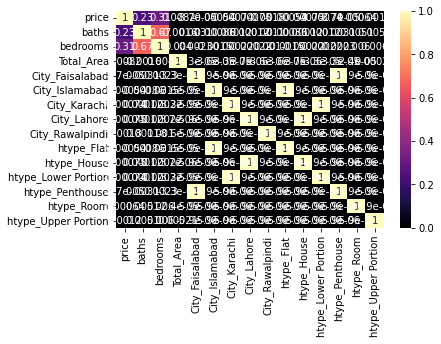

In [529]:
import seaborn as sns


sns.heatmap(X.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

# Categorical to Continuous Values as 0s and 1s for:
# 1) City
# 2) HouseType

In [502]:
#count total cities
City = list(df['city'].unique())
print(f'Number of City-areas: {len(City)}')
print(f'City: {City}')

Number of City-areas: 5
City: ['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi']


In [503]:
#using get_dummies and convert them in 0s, 1s
dummies = pd.get_dummies(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],prefix='City')
print(dummies)

   City_Faisalabad  City_Islamabad  City_Karachi  City_Lahore  City_Rawalpindi
0                0               1             0            0                0
1                0               0             0            1                0
2                1               0             0            0                0
3                0               0             0            0                1
4                0               0             1            0                0


In [504]:
df= pd.concat([df,dummies],axis=1)


In [505]:
df.drop('city', axis=1, inplace=True)

In [506]:
df

,property_type,price,baths,bedrooms,Total_Area,City_Faisalabad,City_Islamabad,City_Karachi,City_Lahore,City_Rawalpindi
0,Flat,10000000,2,2,1089.004,0.0,1.0,0.0,0.0,0.0
1,Flat,6900000,3,3,15246.056,0.0,0.0,0.0,1.0,0.0
2,House,16500000,6,5,2178.008,1.0,0.0,0.0,0.0,0.0
3,House,43500000,4,4,10890.000,0.0,0.0,0.0,0.0,1.0
4,House,7000000,3,3,2178.008,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
168441,House,26500000,0,6,26136.096,NaN,NaN,NaN,NaN,NaN
168442,House,12500000,0,3,2178.008,NaN,NaN,NaN,NaN,NaN
168443,House,27000000,0,6,26136.096,NaN,NaN,NaN,NaN,NaN
168444,House,11000000,0,3,21235.578,NaN,NaN,NaN,NaN,NaN


In [507]:
df.shape

(168446, 10)

In [508]:
df.columns

Index(['property_type', 'price', 'baths', 'bedrooms', 'Total_Area',
       'City_Faisalabad', 'City_Islamabad', 'City_Karachi', 'City_Lahore',
       'City_Rawalpindi'],
      dtype='object')

In [509]:
#conversion for property_type
H_type= list(df['property_type'].unique())
H_type


['Flat',
 'House',
 'Penthouse',
 'Farm House',
 'Lower Portion',
 'Upper Portion',
 'Room']

In [510]:

print(f'Number of House types : {len(H_type)}')
print(f'building type: {H_type}')

Number of House types : 7
building type: ['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion', 'Upper Portion', 'Room']


In [511]:
dummies = pd.get_dummies(['Flat', 'House', 'Penthouse', 'Farm House',
                          'Lower Portion', 'Upper Portion', 'Room'], prefix='htype', drop_first=True)
print(dummies)

   htype_Flat  htype_House  htype_Lower Portion  htype_Penthouse  htype_Room  \
0           1            0                    0                0           0   
1           0            1                    0                0           0   
2           0            0                    0                1           0   
3           0            0                    0                0           0   
4           0            0                    1                0           0   
5           0            0                    0                0           0   
6           0            0                    0                0           1   

   htype_Upper Portion  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
5                    1  
6                    0  


In [512]:
df= pd.concat([df,dummies],axis=1)
df.drop('property_type', axis=1, inplace=True)

In [513]:
df.columns

Index(['price', 'baths', 'bedrooms', 'Total_Area', 'City_Faisalabad',
       'City_Islamabad', 'City_Karachi', 'City_Lahore', 'City_Rawalpindi',
       'htype_Flat', 'htype_House', 'htype_Lower Portion', 'htype_Penthouse',
       'htype_Room', 'htype_Upper Portion'],
      dtype='object')

In [514]:
X= df.replace(np.nan, 0)
X.isnull().sum()


price                  0
baths                  0
bedrooms               0
Total_Area             0
City_Faisalabad        0
City_Islamabad         0
City_Karachi           0
City_Lahore            0
City_Rawalpindi        0
htype_Flat             0
htype_House            0
htype_Lower Portion    0
htype_Penthouse        0
htype_Room             0
htype_Upper Portion    0
dtype: int64

In [515]:
X.columns

Index(['price', 'baths', 'bedrooms', 'Total_Area', 'City_Faisalabad',
       'City_Islamabad', 'City_Karachi', 'City_Lahore', 'City_Rawalpindi',
       'htype_Flat', 'htype_House', 'htype_Lower Portion', 'htype_Penthouse',
       'htype_Room', 'htype_Upper Portion'],
      dtype='object')

In [516]:
X.shape

(168446, 15)

In [517]:
X

,price,baths,bedrooms,Total_Area,City_Faisalabad,City_Islamabad,City_Karachi,City_Lahore,City_Rawalpindi,htype_Flat,htype_House,htype_Lower Portion,htype_Penthouse,htype_Room,htype_Upper Portion
0,10000000,2,2,1089.004,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,6900000,3,3,15246.056,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,16500000,6,5,2178.008,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,43500000,4,4,10890.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7000000,3,3,2178.008,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,26500000,0,6,26136.096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168442,12500000,0,3,2178.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168443,27000000,0,6,26136.096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168444,11000000,0,3,21235.578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [552]:
X['price'].describe()

count    1.684460e+05
mean     1.776576e+07
std      3.531003e+07
min      0.000000e+00
25%      1.750000e+05
50%      8.500000e+06
75%      1.950000e+07
max      2.000000e+09
Name: price, dtype: float64

In [518]:
y=df['price']
y.count() #total values


168446

In [519]:
print(X.shape)
print(y.shape)

(168446, 15)
(168446,)


In [520]:
print(X.isnull())


        price  baths  bedrooms  Total_Area  City_Faisalabad  City_Islamabad  \
0       False  False     False       False            False           False   
1       False  False     False       False            False           False   
2       False  False     False       False            False           False   
3       False  False     False       False            False           False   
4       False  False     False       False            False           False   
...       ...    ...       ...         ...              ...             ...   
168441  False  False     False       False            False           False   
168442  False  False     False       False            False           False   
168443  False  False     False       False            False           False   
168444  False  False     False       False            False           False   
168445  False  False     False       False            False           False   

        City_Karachi  City_Lahore  City_Rawalpindi 

In [521]:
print('-'*30)
print(y.isnull())


------------------------------
0         False
1         False
2         False
3         False
4         False
          ...  
168441    False
168442    False
168443    False
168444    False
168445    False
Name: price, Length: 168446, dtype: bool


# Train-Test Split

In [530]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

# Function for Evaluation the different regression models


In [569]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

def regression(model, X_test, y_test):
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2



# Linear Regression


In [570]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred) #model Evaluation
print('Linear_Regression model Evaluation')
print('--'*30)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)



Linear_Regression model Evaluation
------------------------------------------------------------
MAE: 1.1400431006850747e-08
MSE: 5.664804585779822e-16
RMSE: 2.3800849954948714e-08
R2 Score: 1.0


# Lsso Regression

In [538]:
lasso = Lasso()
lasso.fit(X_train, y_train)
pred_lasso =lasso.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, pred_lasso) #model Evaluation
print('Lasso_Regression model Evaluation')
print('--'*30)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)


Lasso_Regression model Evaluation
------------------------------------------------------------
MAE: 2.286122336186487e-08
MSE: 2.181108954372505e-15
RMSE: 4.6702344206394024e-08
R2 Score: 1.0


# Ridge Regression

In [539]:
ridge = Ridge()
ridge.fit(X_train, y_train)
pred_ridge=ridge.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, pred_ridge) #model Evaluation
print('Ridge_Regression model Evaluation')
print('--'*30)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)



Ridge_Regression model Evaluation
------------------------------------------------------------
MAE: 1.2611139641794805e-08
MSE: 4.632218562161218e-16
RMSE: 2.1522589440309496e-08
R2 Score: 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.81182e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


# Random Forest Regressor

In [540]:
RF_reg=RandomForestRegressor()
RF_reg.fit(X_train, y_train)
pred_RF_reg =RF_reg.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, pred_RF_reg) #model Evaluation
print('Random Forest_Regression model Evaluation')
print('--'*30)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)


Random Forest_Regression model Evaluation
------------------------------------------------------------
MAE: 15024.17982561332
MSE: 5468849645590.729
RMSE: 2338557.171760128
R2 Score: 0.9955079112106316


In [548]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test,pred_xgb ) #model Evaluation
print('XGBoost Regressor model Evaluation:')
print("-"*30)
mae, mse, rmse, r_squared = evaluation(y_test, pred_xgb)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)





[18:09:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Regressor model Evaluation:
------------------------------
MAE: 19293.307195062167
MSE: 4697463596152.285
RMSE: 2167363.281997802
R2 Score: 0.9961415242827611
